# NLP analysis of some of the past President's acceptance speech as the Democratic/Republican presidential candidate.




- **[John F. Kennedy 1960](https://www.jfklibrary.org/learn/about-jfk/historic-speeches/acceptance-of-democratic-nomination-for-president)**
- **[Ronald Reagan 1980](https://www.c-span.org/video/?c4609012/ronald-reagan-1980-republican-party-nomination-acceptance-speech)**
- **[George H.W. Bush 1988](https://www.c-span.org/video/?3848-1/george-hw-bush-1988-acceptance-speech)**
- **[Barack Obama 2008](https://www.npr.org/templates/story/story.php?storyId=94087570)**


### We do some feature engineering, sentient analysis and try to predict which president would have said a specific sentence. At this time the best accuracy is about 60%. 


`NLP`
`NLTK`
`gridsearchCV`
`RandomForest`
`GradientBoost`


***
Developed by __M.Safaei [L i n k e d i n](https://www.linkedin.com/in/mattsafaei/)__

***
__an ongoing project...__






***

In [45]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
pd.set_option('display.max_colwidth', 40)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
data_Kennedy = open("Kennedy.txt").read()
data_Raegan = open("Raegan.txt").read()
data_Bush = open("Bush.txt").read()
data_Obama = open("Obama.txt").read()

data_all = [data_Kennedy,data_Raegan,data_Bush,data_Obama]

In [47]:
for i in data_all:
    print('number of sentences: {}'.format(len(sent_tokenize(i))))

number of sentences: 127
number of sentences: 217
number of sentences: 299
number of sentences: 226


# Sentiment Analysis

- **<font color=green>Green</font>** is overal positive compoundscore <font color=green>(positive statement)</font>
- **<font color=red>Red</font>** is overal negative compound score  <font color=red>(negative statement)</font>
- **<font color=gray>Gray</font>** is overal close to compound zero score <font color=gray>(neutral statement)</font>

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#color code based on compound
def map_colors(a_dict):
    if a_dict['compound'] < 0 : return 41 # negative
    if a_dict['compound'] >0 : return 42 # positive 
    return 47 # neutral

In [49]:
def polarity_print_text(input_file, polarity_list, numsents = 20):
    myList = []
    for i, sentence in enumerate(sent_tokenize(input_file)):
        ss = sid.polarity_scores(sentence)
        #
        if ss['compound'] < 0:
            polarity_list.append('Negative')
            myList.append('Negative')
        elif ss['compound'] > 0:
            polarity_list.append('Positive')
            myList.append('Positive')
        else:
            polarity_list.append('Neutral')
            myList.append('Neutral')
        if i == 0:
            continue
        else:
            if i < numsents:
                if myList[i] != myList[i-1]:
                    print('\033[' + str(map_colors(ss)) + 'm' + sentence + '\033[0m')
    return polarity_list

# Kennedy's Acceptance Speech:

> #### **<font color=green>Green:</font>** <font color=green>positive sentence</font>
> #### **<font color=red>Red:</font>** <font color=red>negative sentence</font>
> #### **<font color=gray>Gray:</font>** <font color=gray>neutral sentence</font>

#### Print is limited to the first 20 sentences to save space

In [50]:
polarity_k = []
polarity_print_text(data_Kennedy,polarity_k);


Pledges which are made so eloquently are made to be kept.
"The Rights of Man"--the civil and economic rights essential to the human dignity of all men--are indeed our goal and our first principles.
I hope that no American, considering the really critical issues facing this country, will waste his franchise by voting either for me or against me solely on account of my religious affiliation.
It is not relevant.
I want to stress, what some other political or religious leader may have said on this subject.


### Since colored Print is not Supported in GitHub, here is snapshop

![RF](./Kennedy.jpg)

# Raegan's speech

In [51]:
polarity_r = []
polarity_print_text(data_Raegan, polarity_r);

We're using up prime time.
Thank you very much.
You're singing our song.
Well, the first thrill tonight was to find myself for the first time in a long time in a movie on prime time.
Now I know we've had a quarrel or two but only as to the method of attaining a goal.
There was no argument here about the goal.
As President, I will establish a liaison with the 50 Governors to encourage them to eliminate, wherever it exists, discrimination against women.
I will monitor Federal laws to insure their implementation and to add statutes if they are needed.
More than anything else, I want my candidacy to unify our country, to renew the American spirit and sense of purpose.
Never before in our history have Americans been called upon to face three grave threats to our very existence, any one of which could destroy us.
We face a disintegrating economy, a weakened defense and an energy policy based on the sharing of scarcity.


# George H.W. Bush's speech

In [52]:
polarity_b = []
polarity_print_text(data_Bush, polarity_b);

Many of you have asked, "When will this campaign really begin?"
For seven and a half years I have helped a President conduct the most difficult job on earth.
Ronald Reagan asked for, and received, my candor.
He never asked for, but he did receive, my loyalty.
And so tonight is for big things.
But I'll try to be fair to the other side.
I'll try to hold my charisma in check.


# Obama's speech

In [53]:
polarity_o = []
polarity_print_text(data_Obama, polarity_o);

That's why I stand here tonight.
Because for 232 years, at each moment when that promise was in jeopardy, ordinary men and women â€” students and soldiers, farmers and teachers, nurses and janitors â€” found the courage to keep it alive.
We meet at one of those defining moments â€” a moment when our nation is at war, our economy is in turmoil, and the American promise has been threatened once more.
Tonight, more Americans are out of work and more are working harder for less.
More of you have lost your homes and even more are watching your home values plummet.
But the failure to respond is a direct result of a broken politics in Washington and the failed policies of George W. Bush.
America, we are better than these last eight years.
This country is more decent than one where a woman in Ohio, on the brink of retirement, finds herself one illness away from disaster after a lifetime of hard work.


Text(0.5, 1.0, "Obama's speech")

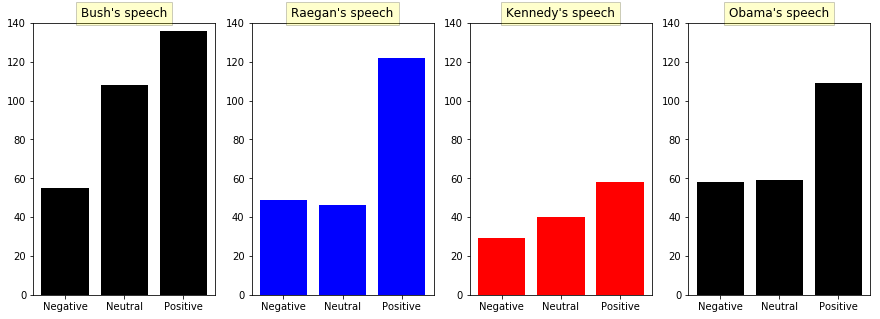

In [54]:
d_b = { x: polarity_b.count(x) for x in list(set(polarity_b))}
d_k = { x: polarity_k.count(x) for x in list(set(polarity_k))}
d_r = { x: polarity_r.count(x) for x in list(set(polarity_r))}
d_o = { x: polarity_o.count(x) for x in list(set(polarity_o))}

box = dict(facecolor='yellow', pad=5, alpha=0.2)

dt = [d_b, d_k, d_r, d_o]
        
fig = plt.figure(figsize=(15,5))

plt.subplot(141)
values = [d_b[i] for i in d_b]
names = [i for i in d_b]
plt.bar(tuple(names), tuple(values) ,color='Black')
plt.ylim([0,140])
plt.title('Bush\'s speech',bbox=box)

plt.subplot(143)
values = [d_k[i] for i in d_k]
names = [i for i in d_k]
plt.bar(tuple(names), tuple(values) ,color='Red')
plt.ylim([0,140])
plt.title('Kennedy\'s speech',bbox=box)

plt.subplot(142)
values = [d_r[i] for i in d_r]
names = [i for i in d_r]
plt.bar(tuple(names), tuple(values) ,color='Blue')
plt.title('Raegan\'s speech',bbox=box)
plt.ylim([0,140])

plt.subplot(144)
values = [d_o[i] for i in d_o]
names = [i for i in d_o]
plt.bar(tuple(names), tuple(values) ,color='Black')
plt.ylim([0,140])
plt.title('Obama\'s speech',bbox=box)



### Raegan's speech

In [55]:
DataFrame_Raegan = pd.DataFrame({
    'Text': sent_tokenize(data_Raegan)
            })
DataFrame_Raegan['Person']=  'Raegan'
DataFrame_Raegan.head(3)

,Text,Person
0,Thank you very much.,Raegan
1,We're using up prime time.,Raegan
2,Thank you very much.,Raegan


### Kennedy's speech

In [56]:
DataFrame_Kennedy = pd.DataFrame({
    'Text': sent_tokenize(data_Kennedy)
                })
DataFrame_Kennedy['Person']=  'Kennedy'
DataFrame_Kennedy.head(3)

,Text,Person
0,"Governor Stevenson, Senator Johnson,...",Kennedy
1,It was my great honor to place his n...,Kennedy
2,With a deep sense of duty and high r...,Kennedy


### Bush's speech

In [57]:
DataFrame_Bush = pd.DataFrame({
    'Text': sent_tokenize(data_Bush)
                })
DataFrame_Bush['Person']=  'Bush'
DataFrame_Bush.head(3)

,Text,Person
0,I have many friends to thank tonight.,Bush
1,I thank the voters who supported me.,Bush
2,I thank the gallant men who entered ...,Bush


### Obama's speech

In [58]:
DataFrame_Obama = pd.DataFrame({
    'Text': sent_tokenize(data_Obama)
                })
DataFrame_Obama['Person']=  'Obama'
DataFrame_Obama.head(3)

,Text,Person
0,To Chairman Dean and my great friend...,Obama
1,Let me express my thanks to the hist...,Obama
2,"To President Clinton, who last night...",Obama


# Cleaning up the sentences

In [59]:
def clean_text_stem(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text


def clean_text_lemmatize(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [60]:
# DataFrame_Kennedy.drop('body_len', inplace=True, axis=1)

## Create pandas dataframe, tokenize, lemmatize and stemmize

In [61]:
DataFrame_Kennedy['stemmed']     = DataFrame_Kennedy['Text'].apply(lambda x: clean_text_stem(x))
DataFrame_Kennedy['stemmed_len'] = DataFrame_Kennedy['stemmed'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Kennedy['lemmatize']    = DataFrame_Kennedy['Text'].apply(lambda x: clean_text_lemmatize(x))
DataFrame_Kennedy['lemmatize_len'] = DataFrame_Kennedy['lemmatize'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Kennedy.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,"Governor Stevenson, Senator Johnson,...",Kennedy,"[governor, stevenson, senat, johnson...",23,"[Governor, Stevenson, Senator, Johns...",23
1,It was my great honor to place his n...,Kennedy,"[It, great, honor, place, name, nomi...",17,"[It, great, honor, place, name, nomi...",17
2,With a deep sense of duty and high r...,Kennedy,"[with, deep, sens, duti, high, resol...",9,"[With, deep, sense, duty, high, reso...",9
3,I accept it with a full and grateful...,Kennedy,"[I, accept, full, grate, heartwithou...",22,"[I, accept, full, grateful, heartwit...",22
4,"I am grateful, too, that you have pr...",Kennedy,"[I, grate, provid, eloqu, statement,...",7,"[I, grateful, provided, eloquent, st...",7


In [62]:
DataFrame_Raegan['stemmed']     = DataFrame_Raegan['Text'].apply(lambda x: clean_text_stem(x))
DataFrame_Raegan['stemmed_len'] = DataFrame_Raegan['stemmed'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Raegan['lemmatize']    = DataFrame_Raegan['Text'].apply(lambda x: clean_text_lemmatize(x))
DataFrame_Raegan['lemmatize_len'] = DataFrame_Raegan['lemmatize'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Raegan.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,Thank you very much.,Raegan,"[thank, much]",2,"[Thank, much]",2
1,We're using up prime time.,Raegan,"[were, use, prime, time]",4,"[Were, using, prime, time]",4
2,Thank you very much.,Raegan,"[thank, much]",2,"[Thank, much]",2
3,You're singing our song.,Raegan,"[your, sing, song]",3,"[Youre, singing, song]",3
4,"Well, the first thrill tonight was t...",Raegan,"[well, first, thrill, tonight, find,...",12,"[Well, first, thrill, tonight, find,...",12


In [63]:
DataFrame_Bush['stemmed']     = DataFrame_Bush['Text'].apply(lambda x: clean_text_stem(x))
DataFrame_Bush['stemmed_len'] = DataFrame_Bush['stemmed'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Bush['lemmatize']    = DataFrame_Bush['Text'].apply(lambda x: clean_text_lemmatize(x))
DataFrame_Bush['lemmatize_len'] = DataFrame_Bush['lemmatize'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Bush.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,I have many friends to thank tonight.,Bush,"[I, mani, friend, thank, tonight]",5,"[I, many, friend, thank, tonight]",5
1,I thank the voters who supported me.,Bush,"[I, thank, voter, support]",4,"[I, thank, voter, supported]",4
2,I thank the gallant men who entered ...,Bush,"[I, thank, gallant, men, enter, cont...",10,"[I, thank, gallant, men, entered, co...",10
3,"And, for their kind and stirring wor...",Bush,"[and, kind, stir, word, I, thank, go...",22,"[And, kind, stirring, word, I, thank...",22
4,I accept your nomination for President.,Bush,"[I, accept, nomin, presid]",4,"[I, accept, nomination, President]",4


In [64]:
DataFrame_Obama['stemmed']     = DataFrame_Obama['Text'].apply(lambda x: clean_text_stem(x))
DataFrame_Obama['stemmed_len'] = DataFrame_Obama['stemmed'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Obama['lemmatize']    = DataFrame_Obama['Text'].apply(lambda x: clean_text_lemmatize(x))
DataFrame_Obama['lemmatize_len'] = DataFrame_Obama['lemmatize'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Obama.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,To Chairman Dean and my great friend...,Obama,"[To, chairman, dean, great, friend, ...",21,"[To, Chairman, Dean, great, friend, ...",21
1,Let me express my thanks to the hist...,Obama,"[let, express, thank, histor, slate,...",22,"[Let, express, thanks, historic, sla...",22
2,"To President Clinton, who last night...",Obama,"[To, presid, clinton, last, night, m...",23,"[To, President, Clinton, last, night...",23
3,I am grateful to finish this journey...,Obama,"[I, grate, finish, journey, one, fin...",21,"[I, grateful, finish, journey, one, ...",21
4,"To the love of my life, our next fir...",Obama,"[To, love, life, next, first, ladi, ...",16,"[To, love, life, next, first, lady, ...",16


In [65]:
dk = DataFrame_Kennedy.copy()
dr = DataFrame_Raegan.copy()
db = DataFrame_Bush.copy()
do = DataFrame_Obama.copy()

dts = [dk, dr, db, do]

In [66]:
Num_words_per_sent = 5
for dt in dts:
    print(dt.loc[0,'Person'],dt[dt['stemmed_len']> Num_words_per_sent][['stemmed_len']].count()[0],dt[dt['stemmed_len']> Num_words_per_sent][['lemmatize_len']].count()[0] ,end='\n')

Kennedy 96 96
Raegan 178 178
Bush 177 177
Obama 168 168


In [67]:
condition= (dk['lemmatize_len'] > 5) & (dk['lemmatize_len'] < 50)
dk.where(condition,inplace=False).dropna().head(2)
print(dk.where(cond=condition,inplace=False).dropna().shape)

(95, 6)


In [68]:
dk.sample(n=3,random_state=42).shape

(3, 6)

### To require a minimum number of key words in the sentence 

In [69]:
# lets see how many lines in each speech is having minimum of 5 stemmed or lemmatized words
for d in dts:
    bad_rows = [row for row in d.index if d.loc[row,'lemmatize_len']< 3 ]
    print('remaining rows for person {} before was : {} and now is {}'.format(d['Person'].loc[1],len(d), len(d.drop(bad_rows))))
    

remaining rows for person Kennedy before was : 127 and now is 121
remaining rows for person Raegan before was : 217 and now is 207
remaining rows for person Bush before was : 299 and now is 276
remaining rows for person Obama before was : 226 and now is 217


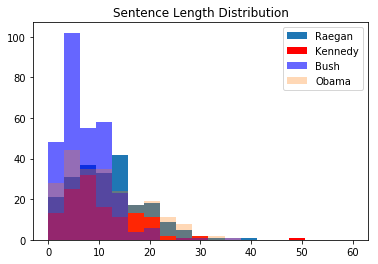

In [70]:
# histogram
import numpy as np
bins = np.linspace(0, 60, 20)
plt.hist(dr['lemmatize_len'], bins, alpha=1, density=False, label='Raegan')
plt.hist(dk['lemmatize_len'], bins, alpha=1, density=False, label='Kennedy', color= 'red')
plt.hist(db['lemmatize_len'], bins, alpha=0.6, density=False, label='Bush', color='b')
plt.hist(do['lemmatize_len'], bins, alpha=0.3, density=False, label='Obama')
plt.title("Sentence Length Distribution")
plt.legend(loc='upper right')
plt.show()

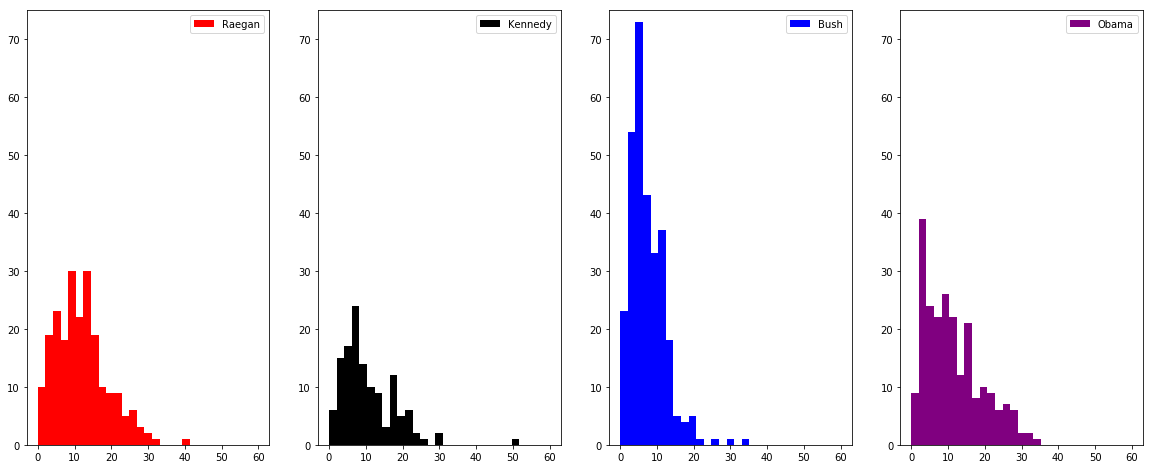

In [71]:
import numpy as np
columns = 'lemmatize_len'
normed = False
ymax = 75

bins = np.linspace(0, 60, 30)

fig = plt.figure(figsize=(20,8))
plt.subplot(141)
plt.hist(dr[columns], bins = bins, density=normed, label='Raegan', color='Red')
plt.ylim([0, ymax])
plt.legend(loc='upper right')
plt.subplot(142)
plt.hist(dk[columns], bins =bins, density=normed, label ='Kennedy', color ='black')
plt.ylim([0, ymax])
plt.legend(loc='upper right')
plt.subplot(143)
plt.hist(db[columns], bins =bins, density=normed, label ='Bush', color ='Blue')
plt.ylim([0, ymax])
plt.legend(loc='upper right')
plt.subplot(144)
plt.hist(do[columns], bins =bins, density=normed, label ='Obama', color ='purple')
plt.ylim([0, ymax])
plt.legend(loc='upper right')
# fig.tight_layout()
plt.show()
condition= (dk['lemmatize_len'] > 5) & (dk['lemmatize_len'] < 50)
dk.where(condition,inplace=False).dropna().head(2)

fig.savefig("test.png")

In [72]:
# remove very short sentences from all speeches
for d in [dk, dr, db, do]:
    d.where(d['lemmatize_len'] >= 3,inplace=True)
    d.dropna(inplace=True)

In [73]:
# The new dataframes have this number of sentences
[len(d) for d in dts]

[121, 207, 276, 217]

In [74]:
num_sents = min([len(d) for d in dts])

In [75]:
# remove very short sentences from all speeches by randomly choosing num_sents from each database
dk = dk.sample(n=num_sents,random_state=42).reset_index(drop=True).copy() 
dr = dr.sample(n=num_sents,random_state=42).reset_index(drop=True).copy()
db = db.sample(n=num_sents,random_state=42).reset_index(drop=True).copy()
do = do.sample(n=num_sents,random_state=42).reset_index(drop=True).copy()

In [76]:
db.shape

(121, 6)

In [77]:
db.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,But I am here tonight - and I am you...,Bush,"[but, I, tonight, I, candid, import,...",12.0,"[But, I, tonight, I, candidate, impo...",12.0
1,I hate war.,Bush,"[I, hate, war]",3.0,"[I, hate, war]",3.0
2,"""Zero tolerance"" isn't just a policy...",Bush,"[zero, toler, isnt, polici, attitud]",5.0,"[Zero, tolerance, isnt, policy, atti...",5.0
3,Our economy is strong but not invuln...,Bush,"[our, economi, strong, invulner, pea...",7.0,"[Our, economy, strong, invulnerable,...",7.0
4,"We're on a journey to a new century,...",Bush,"[were, journey, new, centuri, weve, ...",12.0,"[Were, journey, new, century, weve, ...",12.0


# Text Vectorization using tf-idf and preparing features and lables for model trainig
## Work based on stemmed or lemmatized
## keep 80% for training and rest for final test evaluation


## Tokenization

In [78]:
# define clean function
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [79]:
# Join all dataframes together to train the model

## Bundle all data into one dataframe and then shuffle couple of times

In [80]:
big_data = pd.concat([dk, db,dr,do], axis =0)
big_data.shape

(484, 6)

### Shuffle the rows using 100% sampling without replacement and resetting the index

(shuffling three times because... it sounds better than once)

In [81]:
# let's shuffle three times
big_data = big_data.sample(frac=1,replace=False, random_state=42).reset_index(drop=True)
big_data = big_data.sample(frac=1,replace=False, random_state=42).reset_index(drop=True)
big_data = big_data.sample(frac=1,replace=False, random_state=42).reset_index(drop=True)
big_data

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,This is a Platform on which I can ru...,Kennedy,"[thi, platform, I, run, enthusiasm, ...",6.0,"[This, Platform, I, run, enthusiasm,...",6.0
1,That's not the judgment we need.,Obama,"[that, judgment, need]",3.0,"[Thats, judgment, need]",3.0
2,"America, now is not the time for sma...",Obama,"[america, time, small, plan]",4.0,"[America, time, small, plan]",4.0
3,"One-third of the world, it has been ...",Kennedy,"[onethird, world, said, may, free, o...",16.0,"[Onethird, world, said, may, free, o...",16.0
4,Our task is not merely one of itemiz...,Kennedy,"[our, task, mere, one, item, republi...",7.0,"[Our, task, merely, one, itemizing, ...",7.0
5,And so I know that what it all comes...,Bush,"[and, I, know, come, elect, come, sh...",10.0,"[And, I, know, come, election, come,...",10.0
6,"As for me, I have held high office a...",Bush,"[As, I, held, high, offic, done, wor...",10.0,"[As, I, held, high, office, done, wo...",10.0
7,Weakness and ambivalence lead to war.,Bush,"[weak, ambival, lead, war]",4.0,"[Weakness, ambivalence, lead, war]",4.0
8,In the Republicans who never thought...,Obama,"[In, republican, never, thought, the...",8.0,"[In, Republicans, never, thought, th...",8.0
9,That is the question of the New Fron...,Kennedy,"[that, question, new, frontier]",4.0,"[That, question, New, Frontier]",4.0


### Add the length of raw sentence as a feature to the model

In [82]:
big_data['text_len'] = big_data['Text'].apply(lambda x: len(x) - x.count(" "))
big_data.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len,text_len
0,This is a Platform on which I can ru...,Kennedy,"[thi, platform, I, run, enthusiasm, ...",6.0,"[This, Platform, I, run, enthusiasm,...",6.0,57
1,That's not the judgment we need.,Obama,"[that, judgment, need]",3.0,"[Thats, judgment, need]",3.0,27
2,"America, now is not the time for sma...",Obama,"[america, time, small, plan]",4.0,"[America, time, small, plan]",4.0,37
3,"One-third of the world, it has been ...",Kennedy,"[onethird, world, said, may, free, o...",16.0,"[Onethird, world, said, may, free, o...",16.0,149
4,Our task is not merely one of itemiz...,Kennedy,"[our, task, mere, one, item, republi...",7.0,"[Our, task, merely, one, itemizing, ...",7.0,51


### Double check if sampling took all databases correctly

In [83]:
big_data[big_data['Person']=='Raegan'].count()==big_data[big_data['Person']=='Kennedy'].count()

Text             True
Person           True
stemmed          True
stemmed_len      True
lemmatize        True
lemmatize_len    True
text_len         True
dtype: bool

### Here is when the train_test split is happening

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(big_data[['Text', 'text_len', 'stemmed_len']],
                                                    big_data['Person'], test_size=0.2)

In [85]:
# see the actual number of senteces for train and test
print('train: {} \ntest:  {}'.format(X_train.shape, X_test.shape))

train: (387, 3) 
test:  (97, 3)


### The index for `pd.DataFrame(tfidf_train.toarray())]` starts from 0 unlike the `X_train[['text_len', 'stemmed_len']]` which has the original index, therefore we have to reset the index for `X_train[['text_len', 'stemmed_len']]`

In [86]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['Text'])

tfidf_train = tfidf_vect_fit.transform(X_train['Text'])
tfidf_test = tfidf_vect_fit.transform(X_test['Text'])

X_train_vect = pd.concat([X_train[['text_len', 'stemmed_len']].reset_index(drop=True), 
                          pd.DataFrame(tfidf_train.toarray())], axis=1)

X_test_vect = pd.concat([X_test[['text_len', 'stemmed_len']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,text_len,stemmed_len,0,1,2,3,4,5,6,7,...,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502
0,168,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184486
1,40,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,109,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,26,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,31,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [87]:
y_train.head()

218      Obama
16     Kennedy
291       Bush
406       Bush
107    Kennedy
Name: Person, dtype: object

In [88]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

In [90]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)


print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='micro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='micro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='micro'),3))    

Fit time 0.111
precision 0.433
accuracy_score 0.433
recall_score 0.433


### Exploring parameter settings using GridSearchCV

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
# to suspend the future warnings that can be troublesome specially for MLP
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [93]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train_vect, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.636797,0.027426,0.028334,0.002573,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.607595,0.576923,0.538462,...,0.558140,0.032431,1,0.974026,0.964401,0.970874,0.945338,0.967846,0.964497,0.010097
5,1.631035,0.112422,0.069412,0.019392,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.544304,0.564103,0.538462,...,0.532300,0.030426,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
10,0.931887,0.146029,0.039893,0.014132,None,150,"{'max_depth': None, 'n_estimators': ...",0.569620,0.512821,0.525641,...,0.529716,0.024043,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,1.272973,0.130165,0.060085,0.018662,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.569620,0.525641,0.538462,...,0.524548,0.031425,4,0.980519,0.970874,0.964401,0.938907,0.974277,0.965796,0.014418
4,0.734995,0.032706,0.034435,0.008466,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.582278,0.500000,0.525641,...,0.524548,0.030755,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [94]:
gs_fit.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
from sklearn.model_selection import KFold, cross_val_score

In [96]:
rf = gs_fit.best_estimator_
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_train_vect, y_train, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.52564103, 0.44871795, 0.62337662, 0.42857143, 0.51948052])

# Focus on negative statements

In [97]:
sentients =[]
for row in range(len(big_data)):
    ss = sid.polarity_scores(big_data.loc[row, 'Text'])
    if ss['compound'] < 0 : 
        sentients.append(-1)
    elif ss['compound'] > 0:
        sentients.append(1)
    else:
        sentients.append(0)
sentients[:100]
big_data['POSITIVITY'] = sentients
big_data.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len,text_len,POSITIVITY
0,This is a Platform on which I can ru...,Kennedy,"[thi, platform, I, run, enthusiasm, ...",6.0,"[This, Platform, I, run, enthusiasm,...",6.0,57,1
1,That's not the judgment we need.,Obama,"[that, judgment, need]",3.0,"[Thats, judgment, need]",3.0,27,0
2,"America, now is not the time for sma...",Obama,"[america, time, small, plan]",4.0,"[America, time, small, plan]",4.0,37,0
3,"One-third of the world, it has been ...",Kennedy,"[onethird, world, said, may, free, o...",16.0,"[Onethird, world, said, may, free, o...",16.0,149,-1
4,Our task is not merely one of itemiz...,Kennedy,"[our, task, mere, one, item, republi...",7.0,"[Our, task, merely, one, itemizing, ...",7.0,51,-1


In [98]:
del X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(big_data[['Text', 'text_len', 'stemmed_len', 'POSITIVITY']],
                                                    big_data['Person'], test_size=0.2)

In [99]:
# see the actual number of senteces for train and test
print('train: {} \ntest:  {}'.format(X_train.shape, X_test.shape))

train: (387, 4) 
test:  (97, 4)


In [100]:
### The index for `pd.DataFrame(tfidf_train.toarray())]` starts from 0 unlike the `X_train[['text_len', 'stemmed_len']]` which has the original index, therefore we have to reset the index for `X_train[['text_len', 'stemmed_len']]`

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['Text'])

tfidf_train = tfidf_vect_fit.transform(X_train['Text'])
tfidf_test = tfidf_vect_fit.transform(X_test['Text'])

X_train_vect = pd.concat([X_train[['text_len', 'stemmed_len', 'POSITIVITY']].reset_index(drop=True), 
                          pd.DataFrame(tfidf_train.toarray())], axis=1)

X_test_vect = pd.concat([X_test[['text_len', 'stemmed_len', 'POSITIVITY']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,text_len,stemmed_len,POSITIVITY,0,1,2,3,4,5,6,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,43,7.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,55,8.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,133,14.0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245949
3,89,11.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.246558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,78,8.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [101]:
rf       = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)
y_pred   = rf_model.predict(X_test_vect)

In [102]:
print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='micro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='micro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='micro'),3))    

Fit time 0.111
precision 0.546
accuracy_score 0.546
recall_score 0.546


In [103]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train_vect, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,1.142517,0.288384,0.057447,0.023076,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.556962,0.461538,0.461538,...,0.496124,0.048287,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.982152,0.087771,0.038495,0.004260,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.518987,0.474359,0.500000,...,0.496124,0.019002,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.734619,0.032924,0.046275,0.019458,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.518987,0.487179,0.448718,...,0.490956,0.028757,3,0.987013,0.990291,0.970874,0.980707,0.993569,0.984491,0.008027
11,1.245643,0.422374,0.035181,0.007144,None,300,"{'max_depth': None, 'n_estimators': ...",0.518987,0.448718,0.512821,...,0.490956,0.041364,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,2.017958,0.502104,0.060038,0.011482,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.518987,0.474359,0.461538,...,0.488372,0.041989,5,0.987013,0.990291,0.987055,0.987138,0.993569,0.989013,0.002598


In [104]:
print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='macro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='macro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='macro'),3))    

Fit time 0.111
precision 0.575
accuracy_score 0.575
recall_score 0.575


In [105]:
gs_fit.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=60, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
rf_model = gs_fit.best_estimator_.fit(X_train_vect, y_train)
y_pred   = rf_model.predict(X_test_vect)

print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='macro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='macro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='macro'),3))    

Fit time 0.111
precision 0.576
accuracy_score 0.576
recall_score 0.576


# K-Fold Cross Validation

In [107]:
rf = gs_fit.best_estimator_
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_train_vect, y_train, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.55128205, 0.46153846, 0.36363636, 0.58441558, 0.38961039])

In [108]:
# gs_fit.best_estimator_.predict(X_test_vect)== y_test

In [109]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

In [110]:
print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='macro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='macro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='macro'),3))    

Fit time 0.006
precision 0.445
accuracy_score 0.445
recall_score 0.445


#### Gradient Boost 

In [111]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_train_vect, y_train)
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,17.333291,0.465669,0.007798,0.000777,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': ...",0.544304,0.461538,...,0.475452,0.060715,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,11.644997,0.251446,0.006582,0.000489,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': ...",0.518987,0.512821,...,0.470284,0.069543,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,18.474536,0.627462,0.007579,0.000489,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': ...",0.531646,0.487179,...,0.470284,0.048567,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,26.465589,0.659167,0.009375,0.000798,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': ...",0.493671,0.525641,...,0.467700,0.055125,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,9.385452,0.409251,0.006384,0.000489,0.1,11,50,"{'learning_rate': 0.1, 'max_depth': ...",0.544304,0.474359,...,0.459948,0.061670,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [112]:
cv_fit.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [113]:
y_pred =  cv_fit.best_estimator_.predict(X_test_vect)

print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='macro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='macro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='macro'),3))    

Fit time 0.006
precision 0.518
accuracy_score 0.518
recall_score 0.518
